In [10]:
!pip install earthpy gdal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 25.0 MB/s eta 0:00:00


In [2]:
##The dataset is loaded to your GDrive so need to be mounted
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


Input Image Shape:(13, 4096)
Covariance Matrix Shape:(13, 13)
Principal Components Shape:(3, 13)
Reduced Image Shape:(3, 4096)
Reconstructed Image Shape:(3, 64, 64)
Plotting image in band 1


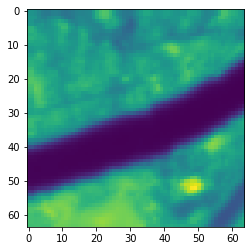

Plotting image in band 2


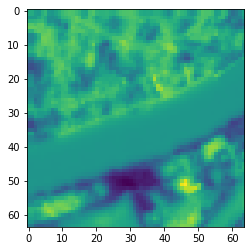

Plotting image in band 3


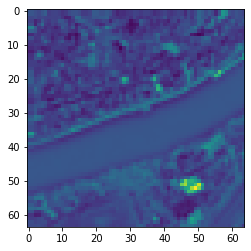

Plotting the composite image


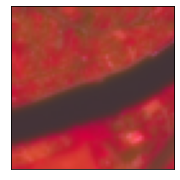

In [12]:
###1] pixel vector dimension = number of bands 
##Required to perform PCA from scratch to obtain pixel vectors of only 3 components

#Feature Vector=Pixel Vector=[number of bands* 1]
#Apply on the whole image data=[number of bands* number of pixels in image]
#where number of pixels in image=[nrows* ncols] of image

#Import all needed libraries
import numpy as np
from osgeo import gdal, gdal_array
import matplotlib.pyplot as plt
import earthpy.plot as ep
import earthpy.spatial as es

#Read in raster image 
##This line should be updated with the name and path of the image
img_ds = gdal.Open('./Forest_27.tif', gdal.GA_ReadOnly)

##Build an array that contains all the image bands
img = np.zeros( (img_ds.RasterCount,img_ds.RasterYSize*img_ds.RasterXSize),
               gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType))

##Construct matrix of pixels
for b in range(img.shape[0]):
  img[b,:] = img_ds.GetRasterBand(b + 1).ReadAsArray().flatten()
print("Input Image Shape:"+str(img.shape))#[number of bands* number of pixels in image]

cov_mat = np.cov(img)
print("Covariance Matrix Shape:"+str(cov_mat.shape))#[number of bands* number of bands]

#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

#Sort the eigenvalues in descending order (Insert in sorted_index starting from end:-1)
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

n_components = 3 #you can select any number of components.   
#Use subset of eigen vectors based on required number of PC's
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

#Transform the data 
pcs=eigenvector_subset.transpose()
print("Principal Components Shape:"+str(pcs.shape))#[number of PC components* number of bands]

img_reduced = np.dot(pcs,img)
print("Reduced Image Shape:"+str(img_reduced.shape))#[number of PC components* number of pixels in image]
#y=DTx=[number of PC components* number of bands][number of bands* number of pixels in image]

##Reconstruct to show image
img_dis=np.zeros((n_components,img_ds.RasterYSize,img_ds.RasterXSize))
print("Reconstructed Image Shape:"+str(img_dis.shape))#[number of PC components* nrows* ncols]

for c in range(n_components):
  img_dis[c,:,:]=img_reduced[c,:].reshape(img_ds.RasterYSize,img_ds.RasterXSize)
  ##Plot image at each principal component:
  print("Plotting image in band "+str(c+1))
  plt.imshow(img_dis[c,:,:])
  plt.show()

print("Plotting the composite image")
rgb = ep.plot_rgb(img_dis, 
                  rgb=(0,1,2), ## rgb(2,1,0) 
                  figsize=(3, 3))
plt.show()


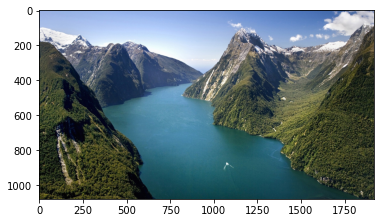

Input Image Shape:(1080, 1920, 3)
For band number: 1
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(3, 1080)
Compressed Image Shape:(3, 1920)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(3, 1080)
Compressed Image Shape:(3, 1920)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(3, 1080)
Compressed Image Shape:(3, 1920)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


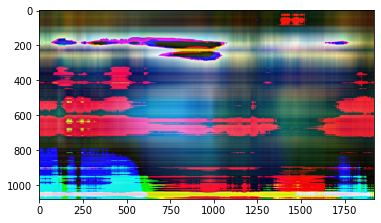

For band number: 1
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(10, 1080)
Compressed Image Shape:(10, 1920)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(10, 1080)
Compressed Image Shape:(10, 1920)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(10, 1080)
Compressed Image Shape:(10, 1920)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


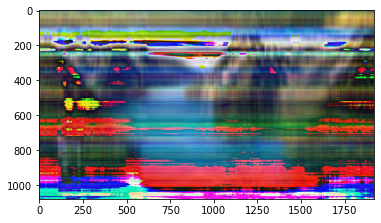

For band number: 1
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(20, 1080)
Compressed Image Shape:(20, 1920)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(20, 1080)
Compressed Image Shape:(20, 1920)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(20, 1080)
Compressed Image Shape:(20, 1920)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


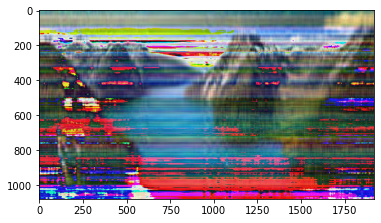

For band number: 1
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(50, 1080)
Compressed Image Shape:(50, 1920)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(50, 1080)
Compressed Image Shape:(50, 1920)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(50, 1080)
Compressed Image Shape:(50, 1920)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


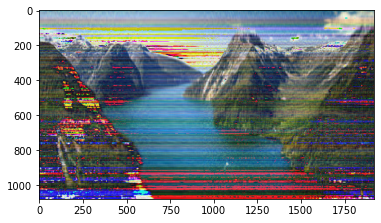

For band number: 1
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(100, 1080)
Compressed Image Shape:(100, 1920)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(100, 1080)
Compressed Image Shape:(100, 1920)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(100, 1080)
Compressed Image Shape:(100, 1920)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


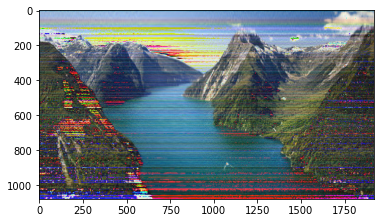

For band number: 1
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(200, 1080)
Compressed Image Shape:(200, 1920)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(200, 1080)
Compressed Image Shape:(200, 1920)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(200, 1080)
Compressed Image Shape:(200, 1920)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


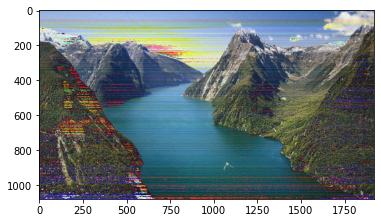

For band number: 1
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(300, 1080)
Compressed Image Shape:(300, 1920)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(300, 1080)
Compressed Image Shape:(300, 1920)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(300, 1080)
Compressed Image Shape:(300, 1920)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


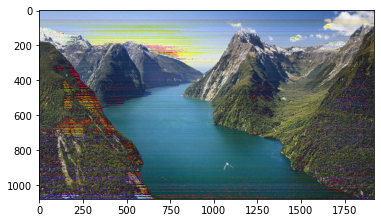

For band number: 1
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(600, 1080)
Compressed Image Shape:(600, 1920)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(600, 1080)
Compressed Image Shape:(600, 1920)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(600, 1080)
Compressed Image Shape:(600, 1920)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


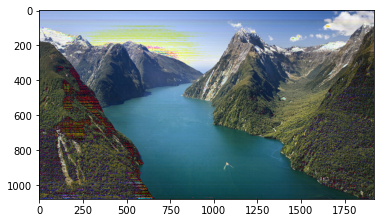

For band number: 1
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(1080, 1080)
Compressed Image Shape:(1080, 1920)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(1080, 1080)
Compressed Image Shape:(1080, 1920)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Covariance Matrix Shape:(1080, 1080)
Principal Components Shape:(1080, 1080)
Compressed Image Shape:(1080, 1920)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


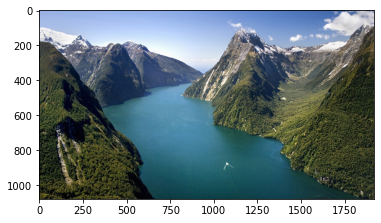

In [20]:
##2]Image compression using PCA from scratch
##Perform PCA on each band alone then perform inverse PCA to decompress the image

#Input is image as is [nrows* ncols]
#Feature Vector=Image Column=[nrow* 1]
#Compression on image number of rows keeping number of columns as is

#Import all needed libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import math

# Loading the image
img = cv2.imread('./Forest_1.jpg')
##Transform image from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
print("Input Image Shape:"+str(img.shape))#[nrows* ncols]

##Try these PCA values:
pc_comp=[3,10,20,50,100,200,300,600,1080] ##Last Value means all the components

for n_components in pc_comp:
  # Splitting the image in R,G,B arrays. 
  RGB= cv2.split(img) 
  imgArr=[]
  for i in range(len(RGB)):
    print("For band number: "+str(i+1))

    cov_mat = np.cov(RGB[i])
    print("Covariance Matrix Shape:"+str(cov_mat.shape))#[nrows* nrows]

    #Calculating Eigenvalues and Eigenvectors of the covariance matrix
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    #Sort the eigenvalues in descending order (Insert in sorted_index starting from end:-1)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    #similarly sort the eigenvectors 
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    
    #Use subset of eigen vectors based on required number of PC's
    eigenvector_subset = sorted_eigenvectors[:,0:n_components]

    #Transform the data 
    pcs=eigenvector_subset.transpose()
    print("Principal Components Shape:"+str(pcs.shape))#[number of PC components* nrows]
    img_compress = np.dot(pcs,RGB[i])
    print("Compressed Image Shape:"+str(img_compress.shape))#[number of PC components* ncols]
    #y=DTx=[number of PC components* nrows][nrows* ncols]
   
    ##Inverse transform to view the decompressed image
    img_invcompress = np.dot(eigenvector_subset,img_compress)
    #x=Dy=[nrows* number of PC components][number of PC components* ncols]
    print("Decompressed Image Shape:"+str(img_invcompress.shape))#[nrows* ncols]
    
    imgArr.append(img_invcompress)

  img_Allch=np.dstack(imgArr).astype(np.uint8)
  print("Plotting Decompressed Image")
  plt.imshow(img_Allch)
  plt.show()

  ##To save new image 
  filename = '/content/drive/MyDrive/SatelliteImagery_Data/ImgFromScratchDecompressed_'+imagename+'_'+str(n_components)+".jpg"
  Image.fromarray(img_Allch).save(filename)


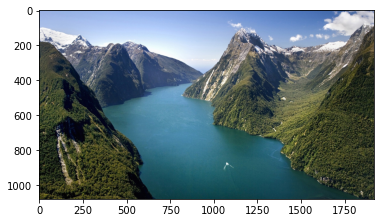

Original Image Shape:(1080, 1920, 3)
For band number: 1
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(3, 1920)
Compressed Image Shape:(1080, 3)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(3, 1920)
Compressed Image Shape:(1080, 3)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(3, 1920)
Compressed Image Shape:(1080, 3)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


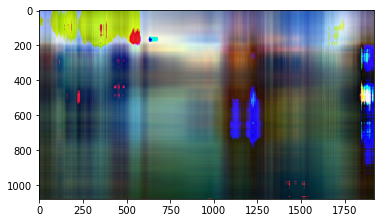

For band number: 1
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(10, 1920)
Compressed Image Shape:(1080, 10)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(10, 1920)
Compressed Image Shape:(1080, 10)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(10, 1920)
Compressed Image Shape:(1080, 10)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


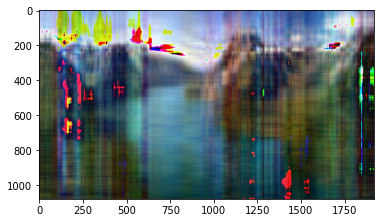

For band number: 1
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(20, 1920)
Compressed Image Shape:(1080, 20)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(20, 1920)
Compressed Image Shape:(1080, 20)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(20, 1920)
Compressed Image Shape:(1080, 20)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


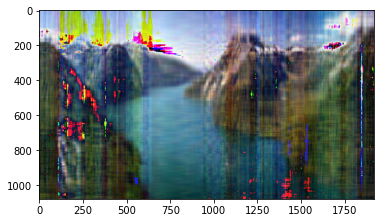

For band number: 1
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(50, 1920)
Compressed Image Shape:(1080, 50)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(50, 1920)
Compressed Image Shape:(1080, 50)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(50, 1920)
Compressed Image Shape:(1080, 50)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


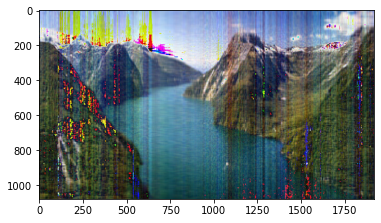

For band number: 1
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(100, 1920)
Compressed Image Shape:(1080, 100)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(100, 1920)
Compressed Image Shape:(1080, 100)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(100, 1920)
Compressed Image Shape:(1080, 100)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


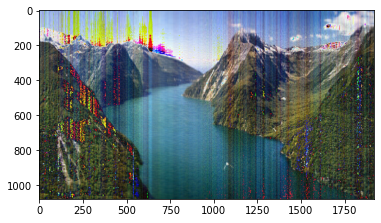

For band number: 1
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(200, 1920)
Compressed Image Shape:(1080, 200)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(200, 1920)
Compressed Image Shape:(1080, 200)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(200, 1920)
Compressed Image Shape:(1080, 200)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


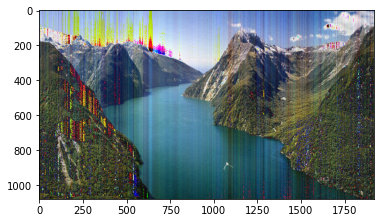

For band number: 1
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(300, 1920)
Compressed Image Shape:(1080, 300)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(300, 1920)
Compressed Image Shape:(1080, 300)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(300, 1920)
Compressed Image Shape:(1080, 300)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


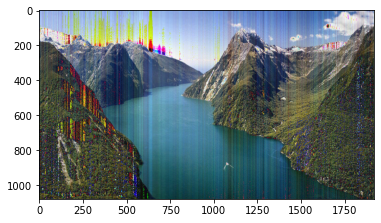

For band number: 1
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(600, 1920)
Compressed Image Shape:(1080, 600)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(600, 1920)
Compressed Image Shape:(1080, 600)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(600, 1920)
Compressed Image Shape:(1080, 600)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


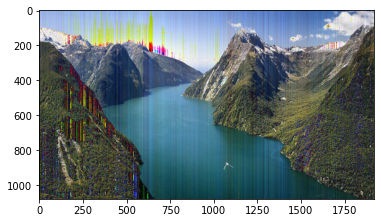

For band number: 1
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(1080, 1920)
Compressed Image Shape:(1080, 1080)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(1080, 1920)
Compressed Image Shape:(1080, 1080)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(1080, 1920)
Compressed Image Shape:(1080, 1080)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


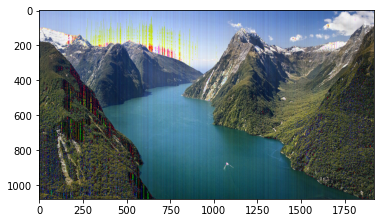

For band number: 1
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(1920, 1920)
Compressed Image Shape:(1080, 1920)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(1920, 1920)
Compressed Image Shape:(1080, 1920)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Input Image Shape:(1920, 1080)
Covariance Matrix Shape:(1920, 1920)
Principal Components Shape:(1920, 1920)
Compressed Image Shape:(1080, 1920)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


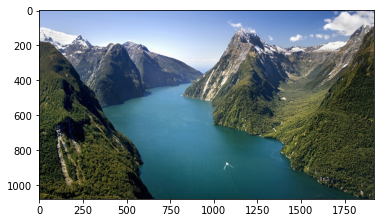

In [21]:
##3]Image compression using PCA from scratch
##Perform PCA on each band alone then perform inverse PCA to decompress the image

#Input is image transposed [ncols* nrows]
#Feature Vector=Image Row=[ncol* 1]
#Compression on image number of columns keeping number of rows as is

#Import all needed libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import math

# Loading the image
#imagename="CoastalLine" 
imagename="SnowMountains" 
img = cv2.imread('/content/drive/MyDrive/SatelliteImagery_Data/'+imagename+'.jpg')
##Transform image from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
print("Original Image Shape:"+str(img.shape))#[nrows* ncols]

##Try these PCA values:
pc_comp=[3,10,20,50,100,200,300,600,1080,1920] ##Last Value means all the components

for n_components in pc_comp:
  # Splitting the image in R,G,B arrays. 
  RGB= cv2.split(img) 
  imgArr=[]
  for i in range(len(RGB)):
    print("For band number: "+str(i+1))
    imgTrans=RGB[i].transpose()
    print("Input Image Shape:"+str(imgTrans.shape))#[ncols* nrows]

    cov_mat = np.cov(imgTrans)
    print("Covariance Matrix Shape:"+str(cov_mat.shape))#[ncols* ncols]

    #Calculating Eigenvalues and Eigenvectors of the covariance matrix
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    #Sort the eigenvalues in descending order (Insert in sorted_index starting from end:-1)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    #similarly sort the eigenvectors 
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    
    #Use subset of eigen vectors based on required number of PC's
    eigenvector_subset = sorted_eigenvectors[:,0:n_components]

    #Transform the data 
    pcs=eigenvector_subset.transpose()
    print("Principal Components Shape:"+str(pcs.shape))#[number of PC components* ncols]
    img_compress = np.dot(pcs,imgTrans)
    #y=DTxT=[number of PC components* ncols][ncols* nrows]=[number of PC components* nrows]
    #Take transpose to get compressed image in alignment with original image
    img_compress=img_compress.transpose()
    print("Compressed Image Shape:"+str(img_compress.shape))#[nrows* number of PC components]
   
    ##Inverse transform to view the decompressed image
    img_invcompress = np.dot(img_compress,pcs)
    #xT=Dy
    #Take transpose to get decompressed image in alignment with original image
    #x=yTDT=[nrows* number of PC components][number of PC components* ncols]
    print("Decompressed Image Shape:"+str(img_invcompress.shape))#[nrows* ncols]
    
    imgArr.append(img_invcompress)

  img_Allch=np.dstack(imgArr).astype(np.uint8)
  print("Plotting Decompressed Image")
  plt.imshow(img_Allch)
  plt.show()

  ##To save new image 
  filename = '/content/drive/MyDrive/SatelliteImagery_Data/TrImgFromScratchDecompressed_'+imagename+'_'+str(n_components)+".jpg"
  Image.fromarray(img_Allch).save(filename)


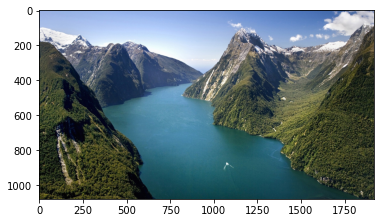

Original Image Shape:(1080, 1920, 3)
For band number: 1
Principal Components Shape:(3, 1920)
Compressed Image Shape:(1080, 3)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Principal Components Shape:(3, 1920)
Compressed Image Shape:(1080, 3)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Principal Components Shape:(3, 1920)
Compressed Image Shape:(1080, 3)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


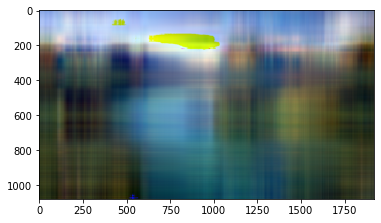

For band number: 1
Principal Components Shape:(10, 1920)
Compressed Image Shape:(1080, 10)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Principal Components Shape:(10, 1920)
Compressed Image Shape:(1080, 10)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Principal Components Shape:(10, 1920)
Compressed Image Shape:(1080, 10)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


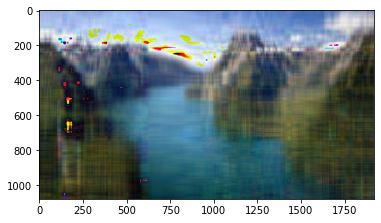

For band number: 1
Principal Components Shape:(20, 1920)
Compressed Image Shape:(1080, 20)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Principal Components Shape:(20, 1920)
Compressed Image Shape:(1080, 20)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Principal Components Shape:(20, 1920)
Compressed Image Shape:(1080, 20)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


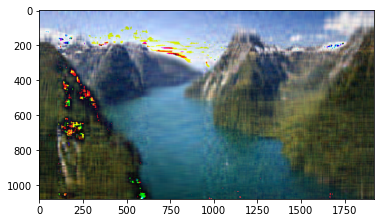

For band number: 1
Principal Components Shape:(50, 1920)
Compressed Image Shape:(1080, 50)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Principal Components Shape:(50, 1920)
Compressed Image Shape:(1080, 50)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Principal Components Shape:(50, 1920)
Compressed Image Shape:(1080, 50)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


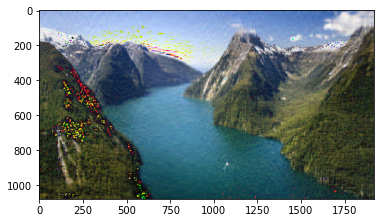

For band number: 1
Principal Components Shape:(100, 1920)
Compressed Image Shape:(1080, 100)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Principal Components Shape:(100, 1920)
Compressed Image Shape:(1080, 100)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Principal Components Shape:(100, 1920)
Compressed Image Shape:(1080, 100)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


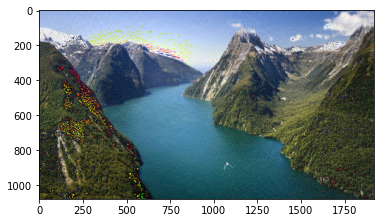

For band number: 1
Principal Components Shape:(200, 1920)
Compressed Image Shape:(1080, 200)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Principal Components Shape:(200, 1920)
Compressed Image Shape:(1080, 200)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Principal Components Shape:(200, 1920)
Compressed Image Shape:(1080, 200)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


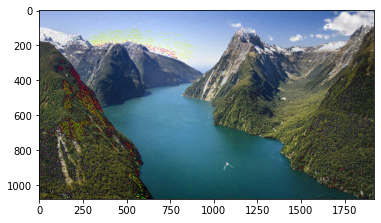

For band number: 1
Principal Components Shape:(300, 1920)
Compressed Image Shape:(1080, 300)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Principal Components Shape:(300, 1920)
Compressed Image Shape:(1080, 300)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Principal Components Shape:(300, 1920)
Compressed Image Shape:(1080, 300)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


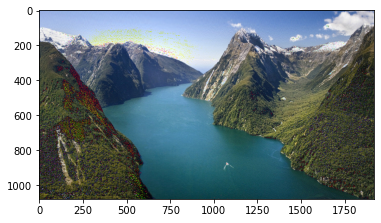

For band number: 1
Principal Components Shape:(600, 1920)
Compressed Image Shape:(1080, 600)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Principal Components Shape:(600, 1920)
Compressed Image Shape:(1080, 600)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Principal Components Shape:(600, 1920)
Compressed Image Shape:(1080, 600)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


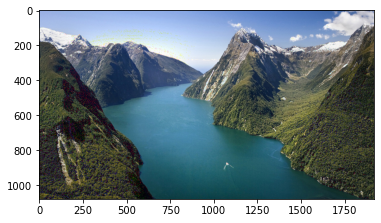

For band number: 1
Principal Components Shape:(1080, 1920)
Compressed Image Shape:(1080, 1080)
Decompressed Image Shape:(1080, 1920)
For band number: 2
Principal Components Shape:(1080, 1920)
Compressed Image Shape:(1080, 1080)
Decompressed Image Shape:(1080, 1920)
For band number: 3
Principal Components Shape:(1080, 1920)
Compressed Image Shape:(1080, 1080)
Decompressed Image Shape:(1080, 1920)
Plotting Decompressed Image


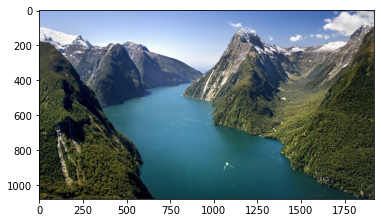

In [22]:
##4]Image compression using ready PCA 
##Perform PCA on each band alone then perform inverse PCA to decompress the image

# Importing required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image, ImageDraw
import math

# Loading the image
#imagename="CoastalLine" 
imagename="SnowMountains" 
img = cv2.imread('/content/drive/MyDrive/SatelliteImagery_Data/'+imagename+'.jpg')
##Transform image from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
print("Original Image Shape:"+str(img.shape))#[nrows* ncols]

##Try these PCA values:
pc_comp=[3,10,20,50,100,200,300,600,1080] 
for n_components in pc_comp:
  # Splitting the image in R,G,B arrays. 
  RGB= cv2.split(img) 
  imgArr=[]
  for i in range(len(RGB)):
    print("For band number: "+str(i+1))
    
    pca = PCA(n_components)
    img_compress = pca.fit_transform(RGB[i])
    print("Principal Components Shape:"+str(pca.components_.shape))#[number of PC components* ncols]
    print("Compressed Image Shape:"+str(img_compress.shape))#[nrows* number of PC components]

    ##Inverse transform to view the decompressed image
    img_invcompress=pca.inverse_transform(img_compress)
    print("Decompressed Image Shape:"+str(img_invcompress.shape))#[nrows* ncols]
   
    imgArr.append(img_invcompress)

  img_Allch=np.dstack(imgArr).astype(np.uint8)
  print("Plotting Decompressed Image")
  plt.imshow(img_Allch)
  plt.show()

  ##To save new image 
  filename = '/content/drive/MyDrive/SatelliteImagery_Data/ReadyDecompressed_'+imagename+'_'+str(n_components)+".jpg"
  Image.fromarray(img_Allch).save(filename)